# Actividad práctica - Curso Elementos de Machine Learning - UBB

@author - Jazna Meza Hidalgo

## Carga de datos y revisión general

In [1]:
import pandas as pd
x_data_frame = pd.read_csv("X.csv", header=None)
y_data_frame = pd.read_csv("Y.csv", header=None)

In [2]:
print(x_data_frame.shape)
print(y_data_frame.shape)

(452, 279)
(452, 1)


In [3]:
y_data_frame.describe()

,0
count,452.000000
mean,3.880531
std,4.407097
min,1.000000
25%,1.000000
50%,1.000000
75%,6.000000
max,16.000000


In [5]:
x_data_frame.describe()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.603551,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-5.600000,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.500000,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,-0.200000,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000


## Revisión de valores nulos

In [6]:
# Valores nulos
for feature in x_data_frame.columns:
    if x_data_frame[feature].isna().sum() > 0:
        print('Columna #', feature, 'eliminada por contar con', x_data_frame[feature].isna().sum(), 'nulos')
        del(x_data_frame[feature])

Columna # 10 eliminada por contar con 8 nulos
Columna # 11 eliminada por contar con 22 nulos
Columna # 12 eliminada por contar con 1 nulos
Columna # 13 eliminada por contar con 376 nulos
Columna # 14 eliminada por contar con 1 nulos


In [7]:
y_data_frame[0].isna().sum()

0

## Selección de data de entrenamiento y validación de acuerdo a requerimiento

In [8]:
y_train = y_data_frame.iloc[:400]
y_test = y_data_frame.iloc[400:]

In [9]:
X_train = x_data_frame.iloc[:400]
X_test = x_data_frame.iloc[400:]

## Estandarización de los datos

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,...,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.0,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-7.105427e-17,-6.217249e-17,2.331468e-16,-7.993606e-17,4.618528e-16,-5.995204e-17,1.421085e-16,1.776357e-16,2.442491e-16,3.774758e-17,...,-5.107026e-17,-9.436896e-17,2.731149e-16,-9.769963e-17,-2.220446e-18,0.0,3.663736e-17,9.769963e-17,-8.881784e-17,-1.776357e-16
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,...,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,0.0,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-2.944738e+00,-1.099975e+00,-1.585991e+00,-3.868858e+00,-1.892161e+00,-3.412762e+00,-4.020728e+00,-1.716624e+00,-3.439315e+00,-4.599850e+00,...,-8.906901e+00,-7.431288e+00,-2.650553e+00,-3.897009e+00,-8.459379e-02,0.0,-3.601959e+00,-5.058843e+00,-2.761678e+00,-3.859153e+00
25%,-6.902733e-01,-1.099975e+00,-1.785527e-01,-5.608328e-01,-6.027838e-01,-3.092061e-01,-5.113181e-01,-6.086780e-01,-4.227069e-01,-6.964182e-01,...,-3.494638e-01,-4.467212e-01,-6.901964e-01,-5.998570e-01,-8.459379e-02,0.0,-3.496258e-01,-4.738422e-01,-6.291827e-01,-6.790933e-01
50%,-1.409041e-03,9.091117e-01,-5.060381e-02,5.176447e-02,-1.616811e-01,4.658070e-02,2.401567e-02,-2.347461e-01,3.551196e-02,1.301909e-01,...,1.985494e-01,5.233575e-01,-5.685035e-02,1.494959e-01,-8.459379e-02,0.0,-5.395916e-02,9.046560e-02,-1.163039e-01,-8.077950e-02
75%,7.031113e-01,9.091117e-01,7.734513e-02,6.643617e-01,3.642491e-01,4.187884e-01,5.073031e-01,2.292064e-01,4.555459e-01,7.271864e-01,...,5.357883e-01,5.233575e-01,6.368144e-01,9.737840e-01,-8.459379e-02,0.0,5.373741e-01,6.547734e-01,4.871962e-01,6.589020e-01
max,2.253056e+00,9.091117e-01,1.568712e+01,6.545295e+00,6.726308e+00,8.059994e+00,4.217464e+00,5.845110e+00,4.388591e+00,3.092207e+00,...,3.739558e+00,5.233575e-01,4.467050e+00,9.737840e-01,1.495430e+01,0.0,5.563707e+00,3.405774e+00,5.351832e+00,3.920355e+00


In [12]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (400, 274)
X_test (52, 274)
y_train (400, 1)
y_test (52, 1)


## Revisión de distribución de datos de entrenamiento y prueba

In [173]:
def verFrecuencias(data):
    df1 = pd.value_counts(data).to_frame().reset_index()
    df1 = df1.rename(columns={"index":"CLASE",0:"FRECUENCIA"})
    print(df1.sort_values(by = "CLASE"))

In [176]:
## Muestra las tablas de frecuencia
print("FRECUENCIAS DATA COMPLETA")
verFrecuencias(y_data_frame[0])   
print("FRECUENCIAS DATOS ENTRENAMIENTO")
verFrecuencias(y_train[0])  
print("FRECUENCIAS DATOS PRUEBA")
verFrecuencias(y_test[0])  

FRECUENCIAS DATA COMPLETA
    CLASE  FRECUENCIA
0     1.0         245
2     2.0          44
6     3.0          15
5     4.0          15
7     5.0          13
3     6.0          25
11    7.0           3
12    8.0           2
8     9.0           9
1    10.0          50
10   14.0           4
9    15.0           5
4    16.0          22
FRECUENCIAS DATOS ENTRENAMIENTO
    CLASE  FRECUENCIA
0     1.0         212
2     2.0          42
6     3.0          14
5     4.0          14
7     5.0          12
3     6.0          24
11    7.0           3
12    8.0           2
8     9.0           8
1    10.0          43
10   14.0           3
9    15.0           4
4    16.0          19
FRECUENCIAS DATOS PRUEBA
    CLASE  FRECUENCIA
0     1.0          33
3     2.0           2
4     3.0           1
8     4.0           1
9     5.0           1
5     6.0           1
6     9.0           1
1    10.0           7
10   14.0           1
7    15.0           1
2    16.0           3


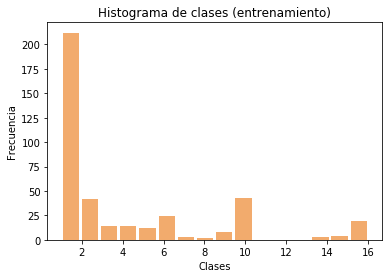

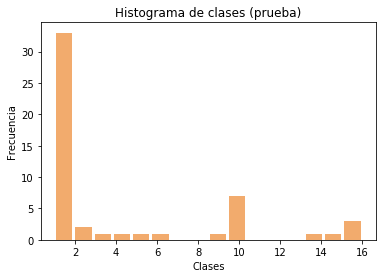

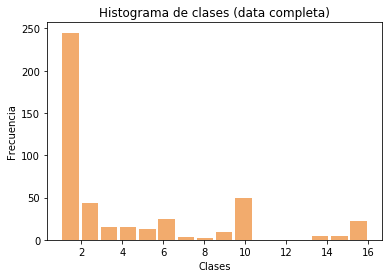

In [158]:
from matplotlib import pyplot as plt
def histogramaClases(data, title = ""):
    datos = pd.Series(np.array(data)) 
    datos.plot.hist(bins=16, color='#F2AB6D', rwidth=0.85) 
    plt.ylabel('Frecuencia')
    plt.xlabel('Clases')
    plt.title('Histograma de clases ' + title)
    plt.show()
    
# Genera las gráficas
histogramaClases(y_train[0], title = "(entrenamiento)")
histogramaClases(y_test[0], title = "(prueba)")
histogramaClases(y_data_frame[0], title = "(data completa)")

## Generación del vector binario

In [75]:
import numpy as np
from tensorflow.keras.utils import to_categorical

y_train_c = to_categorical(np.array(y_train[0]))

In [76]:
y_train_c[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [77]:
y_test_c = to_categorical(np.array(y_test[0]))
y_test_c[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [82]:
y_test_c.shape

(52, 17)

# Trabajando con los modelos

In [33]:
import tensorflow as tf

In [34]:
tf.__version__

'2.3.1'

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


## Definición de algunas funciones

Función usada para graficar los resultados de las redes que se van a construir

In [24]:
def graficaResultados(history, mean = "mean_squared_error", titleMean = "MSE", includeMean = False):
    plt.plot(history.history['accuracy'])
    plt.title('% Acierto')
    plt.xlabel('Época')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.title('loss')
    plt.xlabel('Época')
    plt.show()
    
    if includeMean: 
        plt.plot(history.history[mean])
        plt.title(titleMean)
        plt.xlabel('Época')
        plt.show()
        
def makePredictions(modelo, data_test):
    return modelo.predict(data_test)

## Aplicando los modelos
### Primera arquitectura de red

In [20]:
# Arquitectura base (una capa de entrada y una capa de salida)
def baseline_model():
    # Crear el modelo
    model = tf.keras.models.Sequential(name = "ANN_Base")
    # Agrega capa de entrada
    model.add(tf.keras.layers.Dense(17, activation='sigmoid'))   
    # Capa de salida
    model.add(tf.keras.layers.Dense(17, activation='softmax'))
    # Compilación del modelo
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [129]:
ann_x = baseline_model()
history = ann_x.fit(X_train, y_train_c, validation_split=0.3, epochs = 500, verbose = 0)

### Gráficos de las métricas

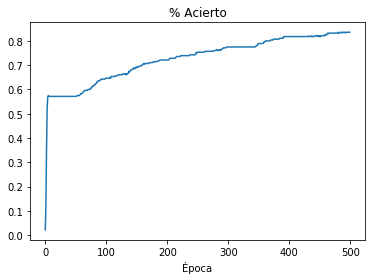

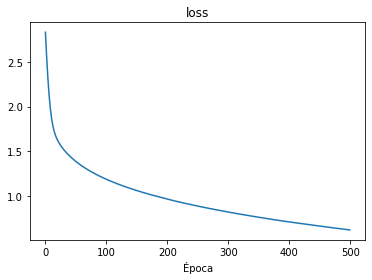

In [130]:
graficaResultados(history)

### Resumen y métrica

In [131]:
ann_x.summary()

Model: "ANN_Base"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 17)                4675      
_________________________________________________________________
dense_85 (Dense)             (None, 17)                306       
Total params: 4,981
Trainable params: 4,981
Non-trainable params: 0
_________________________________________________________________


In [132]:
test_loss, test_acc = ann_x.evaluate(X_test, y_test_c)
print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 2ms/step - loss: 1.1002 - accuracy: 0.7500
Test accuracy: 0.75


### Generación de reportes

In [133]:
from sklearn.metrics import confusion_matrix
predicciones = makePredictions(ann_x, X_test)
y_pred_c = np.argmax(predicciones, axis=1)
matriz = confusion_matrix(y_test, y_pred_c, labels=range(1,17))
print(matriz)

[[32  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0]]


La matriz de confusión anterior el elemento (i,j) representa la cantidad de elementos que siendo de la clase i fueron clasificados por el algoritmo como un elemento de la clase j. Esto sirve para comprobar el reporte que sigue: 

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_c))

              precision    recall  f1-score   support

         1.0       0.80      0.97      0.88        33
         2.0       0.25      0.50      0.33         2
         3.0       1.00      1.00      1.00         1
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         1
        10.0       0.67      0.57      0.62         7
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         3

    accuracy                           0.73        52
   macro avg       0.25      0.28      0.26        52
weighted avg       0.63      0.73      0.67        52



/Users/GhostGirl/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Segunda arquitectura de red

Esta red tiene 3 capas ocultas, cada una de ellas usando la función de activación relu

In [136]:
def secondANN(x_input):
    ann = tf.keras.models.Sequential(name = "Second_ANN")
    # The Input Layer :
    ann.add(tf.keras.layers.Dense(17, activation='sigmoid'))#, input_shape=(x_input,)))    
    ann.add(tf.keras.layers.Dense(17, activation='softmax'))
    ann.add(tf.keras.layers.Dense(17, activation='softmax'))
    # Compilación del modelo
    ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ann

In [137]:
ann_y = secondANN(X_train.shape[1])
history_y = ann_y.fit(X_train, y_train_c, validation_split=0.3, epochs = 500, verbose = 0)

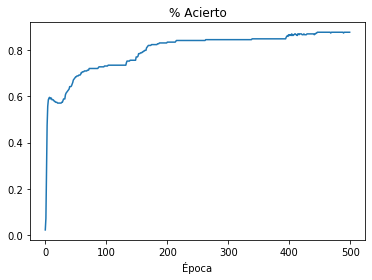

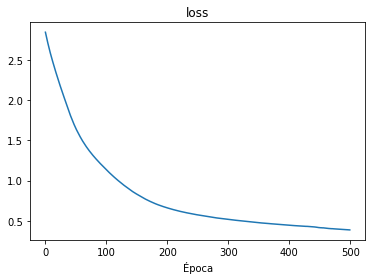

In [138]:
graficaResultados(history_y, mean = "mean_absolute_error", titleMean = "MAE")

In [139]:
ann_y.summary()

Model: "Second_ANN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 17)                4675      
_________________________________________________________________
dense_87 (Dense)             (None, 17)                306       
_________________________________________________________________
dense_88 (Dense)             (None, 17)                306       
Total params: 5,287
Trainable params: 5,287
Non-trainable params: 0
_________________________________________________________________


In [140]:
test_loss, test_acc = ann_y.evaluate(X_test, y_test_c)
print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 2ms/step - loss: 1.3728 - accuracy: 0.6538
Test accuracy: 0.6538461446762085


### Generación de reportes

In [141]:
from sklearn.metrics import confusion_matrix
predicciones = makePredictions(ann_y, X_test)
y_pred_c = np.argmax(predicciones, axis=1)
matriz = confusion_matrix(y_test, y_pred_c, labels=range(1,17))
print(matriz)

[[27  3  0  0  0  2  0  0  0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0]]


In [142]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_c))

              precision    recall  f1-score   support

         1.0       0.87      0.82      0.84        33
         2.0       0.17      0.50      0.25         2
         3.0       0.33      1.00      0.50         1
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         1
        10.0       0.62      0.71      0.67         7
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         3

    accuracy                           0.65        52
   macro avg       0.18      0.28      0.21        52
weighted avg       0.65      0.65      0.64        52



/Users/GhostGirl/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tercera arquitectura

En este caso se cambian las funciones de activación

In [143]:
def thirdANN(x_input_dim):
    ann = tf.keras.models.Sequential(name = "Third_ANN")
    # The Input Layer :
    ann.add(tf.keras.layers.Dense(17, activation='sigmoid'))#, input_shape=(x_input,)))    
    ann.add(tf.keras.layers.Dense(17, activation='tanh'))
    ann.add(tf.keras.layers.Dense(17, activation='softmax'))
    # Compilación del modelo
    ann.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return ann

In [144]:
ann_z = thirdANN(X_train.shape[1])
history_z = ann_z.fit(X_train, y_train_c, validation_split=0.3, epochs = 500, verbose=0)

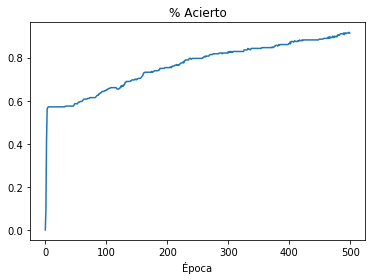

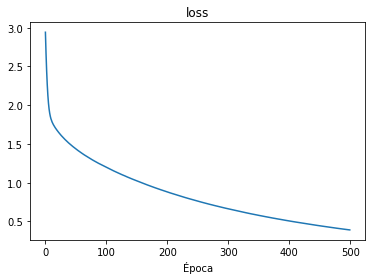

In [145]:
graficaResultados(history_z, mean = "mean_absolute_error", titleMean = "MAE")

In [146]:
test_loss, test_acc = ann_z.evaluate(X_test, y_test_c)
print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 2ms/step - loss: 1.2540 - accuracy: 0.7308
Test accuracy: 0.7307692170143127


### Generación de reportes

In [147]:
from sklearn.metrics import confusion_matrix
predicciones = makePredictions(ann_z, X_test)
y_pred_c = np.argmax(predicciones, axis=1)
matriz = confusion_matrix(y_test, y_pred_c, labels=range(1,17))
print(matriz)

[[32  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 2  1  0  0  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]]


In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_c))

              precision    recall  f1-score   support

         1.0       0.82      0.97      0.89        33
         2.0       0.00      0.00      0.00         2
         3.0       0.33      1.00      0.50         1
         4.0       1.00      1.00      1.00         1
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         1
        10.0       0.80      0.57      0.67         7
        14.0       0.00      0.00      0.00         1
        15.0       0.00      0.00      0.00         1
        16.0       0.00      0.00      0.00         3

    accuracy                           0.73        52
   macro avg       0.27      0.32      0.28        52
weighted avg       0.65      0.73      0.68        52



/Users/GhostGirl/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
